In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

In [ ]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


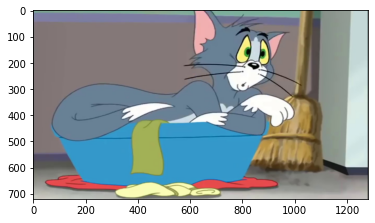

In [ ]:
img = plt.imread('frame2.jpg')   # reading image using its name
plt.imshow(img)

In [ ]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head(10)      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2
5,frame5.jpg,2
6,frame6.jpg,2
7,frame7.jpg,2
8,frame8.jpg,2
9,frame9.jpg,2


In [ ]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [ ]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, data_format=None)      # preprocessing the input data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [ ]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [ ]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [ ]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
7/7 [==============================] - 2s 196ms/step - loss: 0.8475 - accuracy: 0.6154 - val_loss: 0.5300 - val_accuracy: 0.8667
Epoch 2/100
7/7 [==============================] - 1s 166ms/step - loss: 0.2492 - accuracy: 0.9375 - val_loss: 0.3584 - val_accuracy: 0.8889
Epoch 3/100
7/7 [==============================] - 1s 165ms/step - loss: 0.1110 - accuracy: 0.9808 - val_loss: 0.2934 - val_accuracy: 0.8778
Epoch 4/100
7/7 [==============================] - 1s 166ms/step - loss: 0.0607 - accuracy: 0.9904 - val_loss: 0.2541 - val_accuracy: 0.9111
Epoch 5/100
7/7 [==============================] - 1s 166ms/step - loss: 0.0400 - accuracy: 0.9952 - val_loss: 0.2687 - val_accuracy: 0.9111
Epoch 6/100
7/7 [==============================] - 1s 166ms/step - loss: 0.0286 - accuracy: 0.9952 - val_loss: 0.2489 - val_accuracy: 0.9111
Epoch 7/100
7/7 [==============================] - 1s 165ms/step - loss: 0.0265 - accuracy: 0.9904 - val_loss: 0.2536 - val_accuracy: 0.8889
Epoch 8/100
7